In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as statsp
import ancilliary_funcs as fx

# Unidad 3: Variables Aleatorias y Gráficos

## Ejercicio 1: Importe un csv de su compañero

* Utilice la base de datos de un compañero creada en la sesión pasada.

## Ejercicio 2: Importe su conjunto de funciones

* Genere un archivo `ancilliary_funcs.py` para guardar las funciones creadas en la sesión pasada e impórtelo.
* Utilice las funciones creadas para inspeccionar la cantidad de casos perdidos de la muestra de su compañero.

In [51]:
df_co = pd.read_csv('subsample_coj.csv')
df_ec = pd.read_csv('subsample_ec.csv')
df_co.rename(columns = {'Unnamed: 0':'index'}, inplace = True)

In [80]:
df_co.head()
df = pd.read_csv('qog_std_cs_jan18.csv')

In [10]:
fx.fetch_perdidas(df_co, 'undp_hdi')

Columna: undp_hdi
False    92
True      5
Name: undp_hdi, dtype: int64
False    0.948454
True     0.051546
Name: undp_hdi, dtype: float64




In [20]:
columnas = ['undp_hdi', 'cname', 'ht_region', 'gle_cgdpc', 'imf_pop', 'wef_imort', 'who_alc2000','who_tobt','wdi_exph']

In [21]:
for i in columnas:
    fx.fetch_perdidas(df_co, i)

Columna: undp_hdi
False    92
True      5
Name: undp_hdi, dtype: int64
False    0.948454
True     0.051546
Name: undp_hdi, dtype: float64


Columna: cname
False    97
Name: cname, dtype: int64
False    1.0
Name: cname, dtype: float64


Columna: ht_region
False    97
Name: ht_region, dtype: int64
False    1.0
Name: ht_region, dtype: float64


Columna: gle_cgdpc
False    97
Name: gle_cgdpc, dtype: int64
False    1.0
Name: gle_cgdpc, dtype: float64


Columna: imf_pop
False    71
True     26
Name: imf_pop, dtype: int64
False    0.731959
True     0.268041
Name: imf_pop, dtype: float64


Columna: wef_imort
False    72
True     25
Name: wef_imort, dtype: int64
False    0.742268
True     0.257732
Name: wef_imort, dtype: float64


Columna: who_alc2000
False    92
True      5
Name: who_alc2000, dtype: int64
False    0.948454
True     0.051546
Name: who_alc2000, dtype: float64


Columna: who_tobt
False    62
True     35
Name: who_tobt, dtype: int64
False    0.639175
True     0.360825
Name: who_to

## Ejercicio 3: Estime el puntaje z para las 10 primeras y últimas observaciones de las variables con una menor cantidad de datos perdidos

* Genere una nueva columna en la tabla de datos mediante funciones vectorizadas. Recuerde que para calcular el puntaje z de una observación se utiliza la fórmula: ![alttext](eq1.gif).
* Para ordenar los valores pueden utilzar la función `sort_values` del `DataFrame` analizado. Lean la documentación asociada al argumento `by`. Para evitar conflictos en la sobreescritura 
* Asegúrense de eliminar las observaciones que tengan valores perdidos con `dropna`. Lean la documentación asociada al método `subset`.
* Seleccionen las primeras y últimas 10 observaciones de la base reordenada. ¿Qué características en común se encuentran?

La variable con menos faltantes es **wdi_exph: Government expenditure on health, total (% of GDP).**

In [52]:
# df_co_dropna =  df_co['wdi_exph'].dropna(subset=['cname','ht_region'])
df_co_dropna =  df_co.dropna(subset=['wdi_exph'])
df_co_dropna = pd.DataFrame(df_co_dropna)
df_co_dropna

,index,undp_hdi,cname,ccodealp,ht_region,gle_cgdpc,imf_pop,wef_imort,who_alc2000,who_tobt,wdi_exph
0,44,0.773,Cuba,CUB,2,5899.93990,NaN,NaN,4.370000,36.099998,11.058801
1,119,NaN,Nauru,NRU,9,3130.47000,0.012000,NaN,NaN,48.900002,3.326649
2,64,0.924,Germany,DEU,5,39486.69900,80.983002,3.400000,11.030000,30.700001,11.297001
3,78,0.774,Iran,IRN,3,12889.28000,75.150002,15.100000,0.030000,11.700000,6.894922
4,34,0.394,Chad,TCD,4,1651.05000,NaN,89.400002,0.640000,NaN,3.621164
5,136,0.679,Philippines,PHL,7,3953.10010,100.149002,23.500000,4.520000,26.700001,4.709985
6,40,0.590,Congo,COG,4,2369.84010,NaN,NaN,3.820000,18.500000,5.151412
7,173,0.718,Tonga,TON,9,3962.06010,0.104000,NaN,0.960000,30.200001,5.176771
8,53,0.582,Equatorial Guinea,GNQ,4,15412.43000,NaN,NaN,10.720000,NaN,3.804079
9,50,0.718,Dominican Republic,DOM,2,10376.63000,NaN,22.799999,5.920000,14.500000,4.375778


In [53]:
df_co_dropna['z'] = (df_co_dropna['wdi_exph']-df_co_dropna['wdi_exph'].mean())/(df_co_dropna['wdi_exph'].var())

In [58]:
df_co_dropna=df_co_dropna.sort_values(by=['z'])

In [63]:
df_co_dropna[['z','cname']].head(10)

,z,cname
44,-0.753975,Timor-Leste
72,-0.697412,Laos
82,-0.637956,Myanmar
80,-0.555180,Indonesia
1,-0.485638,Nauru
20,-0.483951,Eritrea
15,-0.469576,Gabon
74,-0.452695,Oman
49,-0.449930,Bhutan
4,-0.442951,Chad


In [64]:
df_co_dropna[['z','cname']].tail(10)

,z,cname
51,0.528516,Moldova
75,0.535061,Serbia
62,0.563969,Djibouti
58,0.567809,Belgium
18,0.571132,Lesotho
37,0.611660,Netherlands
0,0.635069,Cuba
2,0.669594,Germany
11,1.018889,Micronesia
10,1.429033,Tuvalu


## Ejercicio 4: Estime el puntaje z de las regiones

* Para ello, modifique la función para generar dotplots de la semana pasada, donde deberá agregar una opción al argumento `statistic` para calcular el puntaje z.

In [65]:
df_co_dropna['ht_region'] = df_co_dropna['ht_region'].replace([1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                                                           ['EastEurope', 'LatAm', 'NorthAfrica',
                                                            'SubSaharian', 'WesternDem', 'EastAsia',
                                                            'SouthEastAsia','SouthAsia','Pacific', 'Caribbean' ])

In [86]:
def get_dotplot_z(dataframe, plot_var, plot_by, global_stat= False, statistic = 'mean'):
    plt.title('Dot plot agrupado por '+ plot_by+ ' de la variable '+ plot_var )
    group_mean = round(dataframe.groupby(plot_by)[plot_var].mean(),2)
    plt.plot(group_mean.values, group_mean.index, 'o', color ='grey')
    
    if global_stat == False:
        if statistic == 'mean':
            plt.axvline(dataframe[plot_var].mean(), color = 'tomato', linestyle = '--'); # 
        elif statistic == 'median':
            plt.axvline(dataframe[plot_var].median(), color = 'tomato', linestyle = '--')
        else:
            plt.axvline(0, color = 'tomato', linestyle = '--')

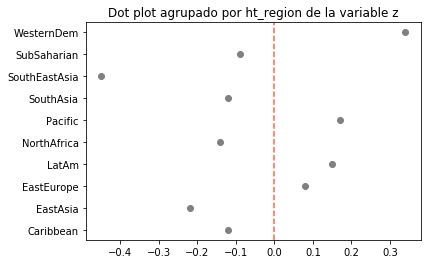

In [89]:
get_dotplot_z(df_co_dropna, 'z','ht_region', global_stat=False, statistic = 'z') #Cambie el argumento global_stat, dado que la base original no tiene calculado el puntaje Z


## Ejercicio 5: Genere un método que devuelva un gráfico comparando dos curvas de densidad

* El método debe contener los siguientes argumentos:
    - `df1`: Su base de datos segmentada.
    - `df2`: Base segmentada de su compañero.
    - `variable`: Variable a contrastar.
    - `log`: Booleano. Si es `True` transformar la variable al logaritmo. Por defecto debe ser `False`.
* Grafique las curvas para `imf_pop`, `gle_cgdpc` y `undp_hdi`. ¿En qué casos es necesario utilizar logaritmos? ¿Por qué?

In [97]:
df_ec = pd.read_csv('subsample_ec.csv')
df_ec.head()

,Unnamed: 0,undp_hdi,cname,ccodealp,ht_region,gle_cgdpc,imf_pop,ffp_hf,wef_qes,wdi_expedu,wdi_ners
0,151,0.491,Senegal,SEN,SubSaharian,1527.99000,NaN,7.4,3.760167,7.39620,NaN
1,54,0.441,Ethiopia (1993-),ETH,SubSaharian,900.77002,88.347,7.0,3.599252,4.50051,30.274250
2,111,NaN,Monaco,MCO,WesternDem,108481.13000,NaN,NaN,NaN,1.02195,NaN
3,164,0.488,Sudan (2012-),SDN,SubSaharian,NaN,NaN,8.8,NaN,NaN,NaN
4,140,0.603,Timor-Leste,TLS,SouthEastAsia,1957.81010,1.146,7.0,2.449351,7.77500,51.849049


In [193]:
def densidad(df1,df2,variable,log=False):
    plt.hist(df1[variable].dropna(), color='grey', alpha=.0, normed=True)
    if log == False:
        x_min, x_max = plt.xlim()
        x_axis = np.linspace(x_min, x_max, 100)
        plt.title("Curva densidad de "+variable)

        gauss_kde = statsp.gaussian_kde(df1[variable].dropna()) # Kernel gaussiano
        Z = np.reshape(gauss_kde(x_axis).T, x_axis.shape)
        plt.plot(x_axis, Z, color='tomato', lw=3, label='Subsample Co')

        gauss_kde2 = statsp.gaussian_kde(df2[variable].dropna()) # Kernel gaussiano
        Z = np.reshape(gauss_kde2(x_axis).T, x_axis.shape)
        plt.plot(x_axis, Z, color='blue', lw=3, label='Subsample Ec')
        plt.legend()
        
    else:
        x_min, x_max = plt.xlim()
        x_axis = np.linspace(x_min, x_max, 100)
        plt.title("Curva densidad de "+variable)

        gauss_kde = statsp.gaussian_kde(df1[variable].dropna()) # Kernel gaussiano
        Z = np.reshape(gauss_kde(x_axis).T, x_axis.shape)
        plt.plot(x_axis, np.log(Z), color='tomato', lw=3, label='Subsample Co')

        gauss_kde2 = statsp.gaussian_kde(df2[variable].dropna()) # Kernel gaussiano
        Z = np.reshape(gauss_kde2(x_axis).T, x_axis.shape)
        plt.plot(x_axis, np.log(Z), color='blue', lw=3, label='Subsample Ec')
        plt.legend()

        
   

    #df1= df_co_dropna df2=df_ec variable='undp_hdi'
    






/home/eduardo/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


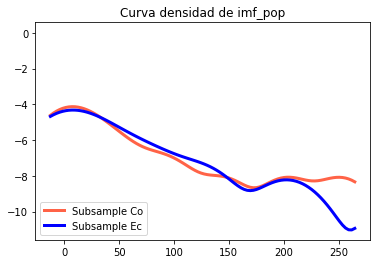

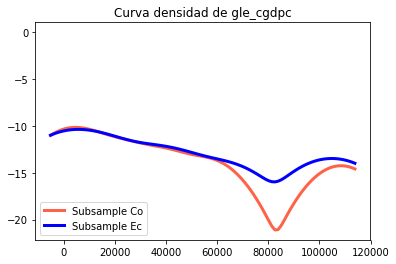

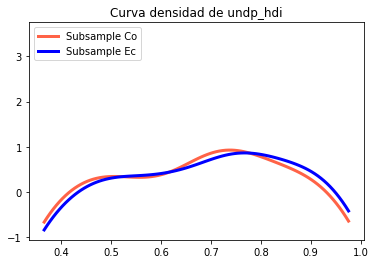

In [194]:
for i in ['imf_pop', 'gle_cgdpc', 'undp_hdi']:
    plt.figure()
    densidad(df_co_dropna, df_ec, i, True)

/home/eduardo/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


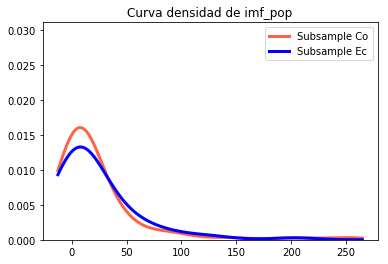

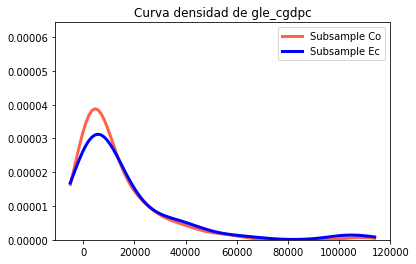

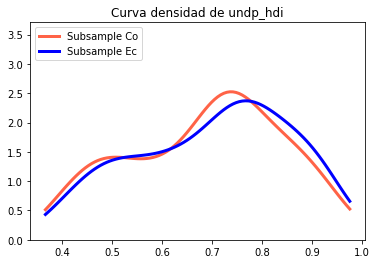

In [195]:
for i in ['imf_pop', 'gle_cgdpc', 'undp_hdi']:
    plt.figure()
    densidad(df_co_dropna, df_ec, i, False)

imf_pop y gle_gdcpc requieren ser en base logaritmo